# Introduction

In this workshop, we will consider the online advertising market *from the perspective of the advertisers*. In particular, you have been hired by Ben, the CEO of a legacy high-street fashion retailer in the UK. In the past few years, the retail sector has been profundly disrupted by online purchasing behaviors. In-store sales have sharply declined by 4% per year, while online sales are growing at a steady 10% per year. While Ben's business has been relatively resilient across his network of stores, the push toward "online retailing" is irresistible. Ben has made sizeable investments to build a modern online retail platform. That said, the traffic (i.e., volume of visitors) to his e-commerce website remains limited, and the online business is still fledgling. 

You first mission is to operate a large-scale online advertising campaign to attract more users to the platform and bring awareness around the online presence of Ben's fashion brand. Ben wants to spend at least £1M during one month, and attract at least 200K new visitors. Ben vaguely remembers from his EMBA at LBS that *optimization* plays an important role in online advertising. However, the online advertising eco-system is complex and difficult to navigate. 

### Online advertising eco-system

The online advertising eco-system has two main intermediaries.

<img src="advertising.png" width="500">

- *Online ad exchanges*: The ad exchanges run auctions to allocate advertising space to advertisers. The ad exchange is responsible for the auction mechanism (who gets what? at which price?). The most popular online ad exchanges are Facebook and Google Ads. 
- *Demand-side platforms (DSP)*: DSPs manage the client side. DSPs are responsible for the operational execution of online advertising campaigns on behalf of the advertisers. They decide whether they should participate in each eligible auction and how much to bid.

Ben has  hired a DSP to run a campaign on Google Adwords. However, there are are number of parameters that need to be determined. You will work towards answering the following fundamental questions:
- *Which keywords should you advertise to?*
- *How should you allocate your budget across keywords?*
- *What total budget should be endowed to the advertising campaign?*

*Terminology*: When the DSP wins an auction, the ad is displayed to the corresponding user. This is known as an *impression*. The main metric tracked by the advertiser is the *cost-per-click* (CPC). This notion corresponds to the rate of budget spent per click. The CPC for a given keyword $k$ is computed as follows:

$$ CPC(k) = \frac{{\rm amount\ spent\ on\ keyword\ }{ k}}{{\rm number\ of\ clicks\ on\ keyword\ }{ k}} \ .$$

### Your assignment (Please read carefully the instructions!)

*Historical data*: The DSP platform has given you access to historical data to guide your decisions. The data has been generated by  advertising campaigns conducted by the DSP for similar clients (namely, competing retailers with the same positioning in the UK). Specifically, each observation is a combination of a keyword and a spend level, as well as the resulting number of clicks. Each user's click is redirected to the e-commerce website, so that each click roughly corresponds to a new visitor.

*Approach*: Your goal is to build a model to decide on how much should be spent on each keyword, given a prospective budget of £1M. The historical data will be utilized to construct a model that predicts the cost-per-click. Next, the "optimal" budget allocation is determined via a linear programming model.

*Workshop instructions*: **Please carefully read all the instructions below:**
- The code cells are partially filled. You need to complete and execute the code in each cell. *You can consult any material posted on Canvas to help you get started with the syntax. You can ask questions to the TAs and discuss with your teammates.*
- Make sure to answer all the questions along the way in a detailed manner.
- This is an individual assignment; you should differentiate your coding style, answers, commenting, etc. from those of your teammates.
- Only Q1-Q5 are meant to be covered in class. You are free to start working on the other questions, but you should not exchange with your teammates on all remaining questions.

*Submission*: Your submission should include the following:
- *Notebook:* An html file along with a .ipynb file **(85 pt)**
- *Executive summary:* A 1 pager report summarizing all your findings (at least 11 pt font, 1 inch margin, pdf/doc format). This report should take the form of an executive summary that combines elements of your analysis and business recommendations. Supporting evidence can be provided in an appendix, or by referencing the questions of the workshop. The report will be evaluated along 3 dimensions: clarity, scientific validity, practical relevance. **(15 pt)**

# Q1. Explore the data (10 pt)

The DSP platform has shared data on five potentially keywords, which have been carefully selected by Ben and his chief marketing officer. For each keyword, the DSP has identified UK retailers amongst its previous clients, having the same product positioning as Ben's. These retailers have spent various amounts on each keyword in the past quarter, ranging from thousands to millions of pounds per month. The DSP provides the exact amount spent in each campaign, as well as the number of generated clicks. The campaign data is reported on a monthly basis.

### Q1.1. Load the data

1. *Use the dataframe methods `.head()` and `.describe()` to visualize the table entries.*
- *Aggregate the data by keyword using the `.groupby()` construct and compute different statistics (e.g., `.mean()`).*

In [134]:
import pandas as pd
df = pd.read_csv("data_keywords.csv").set_index("ID")

In [135]:
# Insert your code below
df.head()

,keyword,budget,clicks
ID,,,
1,retail UK,10022.696190,3021
2,retail UK,18434.623580,5570
3,retail UK,11439.698520,3498
4,retail UK,2985.138079,995
5,retail UK,16968.520950,5121


In [136]:
df.describe()

,budget,clicks
count,145.000000,145.000000
mean,144266.904428,14507.482759
std,267773.129547,28965.202034
min,555.151409,305.000000
25%,8422.761074,2550.000000
50%,17608.171090,4994.000000
75%,76357.516670,9708.000000
max,998166.121400,143466.000000


In [137]:
df.groupby("keyword").mean()

,budget,clicks
keyword,,
cardigan,143983.169227,8550.137931
dua lipa gloves,166678.027221,4688.413793
free shipping UK,230491.680782,37462.137931
retail UK,11756.240907,3024.862069
spotted dress,168425.404002,18811.862069


### Q1.2. Define the cost-per-click (CPC) as a new column of the dataframe `df`

In [138]:
# Uncomment and fill the code below
df['CPC'] =df['budget']/df['clicks']

Below, we provide code to construct a boxplot diagram (using `sns.boxplot()`) that represents the distribution of the cost-per-click CPC for each keyword, using the package seaborn.

*Note: In data science practice, it is preferable to include all the package/module dependencies at the beginning of your notebook or script. That said, for greater clarity in this workshop, we introduce them in a gradual manner.*

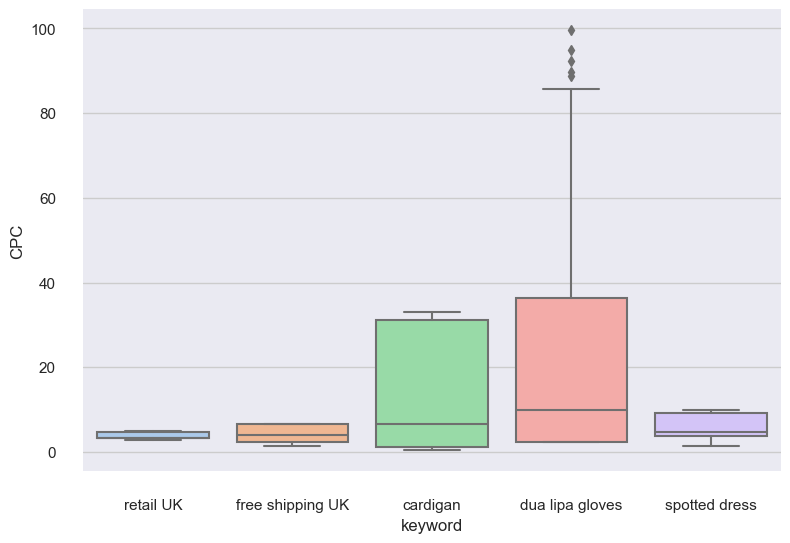

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(9,6))
sns.set(style="ticks", palette="pastel")
# Draws a boxplot to show CPC per keyword
sns.boxplot(x="keyword", y="CPC",
            data=df)             
# The next command is used to adjust the display
sns.despine(offset=10, trim=True)

### Q1.3. Which keyword has the best CPC? Which keyword has the worst CPC? What hypotheses might explain the level of variability of CPC within the same keyword?

*Insert your answer below: "dua lipa gloves" has the highest (worst) mean and median CPC while "retail UK" has the lowest (best) mean and median CPC. The level of variability within the same keyword might be explained by the fact that the relationship between ad spend (budget) and number of click is not linear, or by the fact that there are other factors besides budget which influence the number of clicks.*


A finer visualization is proposed below. *Execute the code in the next cells and try to interpret it. You can vary some of the arguments.*

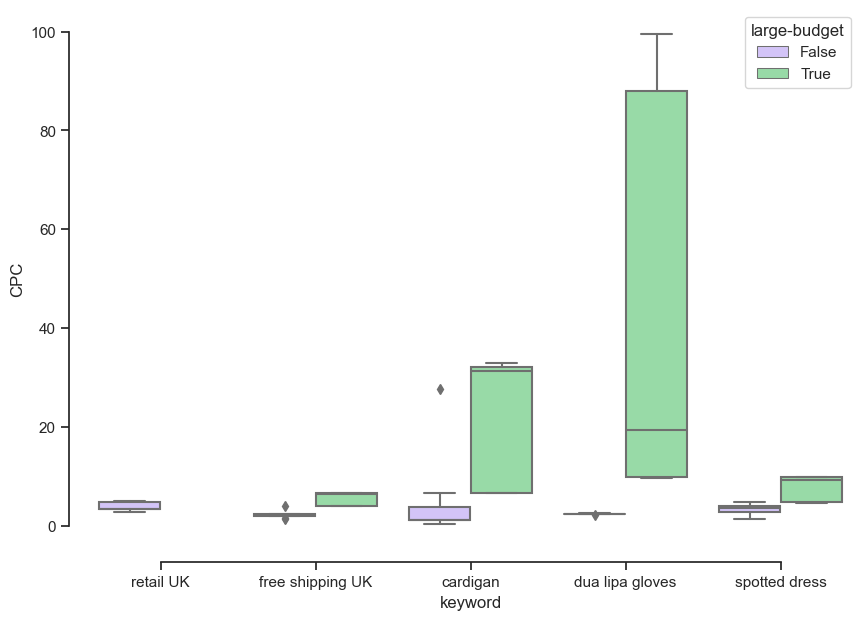

In [140]:
df['large-budget'] = df['budget']>=20000
plt.subplots(figsize=(10,7))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="keyword", y="CPC",hue="large-budget", palette=["m", "g"],
            data=df)             
sns.despine(offset=10, trim=True)

['retail UK', 'free shipping UK', 'cardigan', 'dua lipa gloves', 'spotted dress']


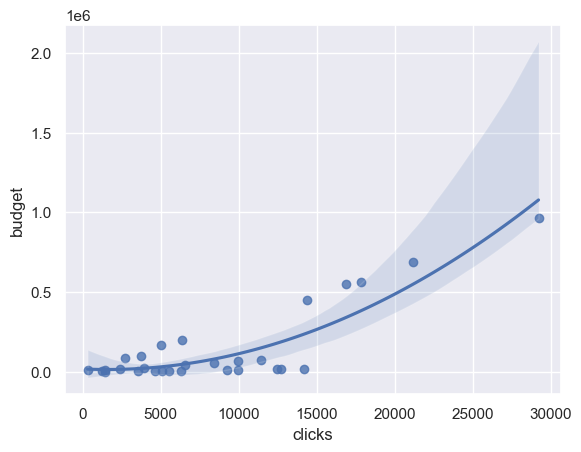

In [141]:
sns.set()
keywords = df.keyword.drop_duplicates().tolist()
print(keywords)
ax = sns.regplot(x="clicks", y="budget", data=df[df["keyword"] == "cardigan"],order = 2)

### Q1.4. How do you interpret the plots above?

*Insert your answer below:The boxplot above suggests that larger budgets are associated with a higher CPC. Similarly, the scatterplot with the fitted nonlinear trend suggests that there is a nonlinear relationship betweem budget and clicks. It appears that for relatively low budgets (<£250K) there is a very high variability in the number of clicks, which can be anywhere between 0 and 15000. However, to achieve a number of clicks that is higher than 15000, the budget needs to be increased considerably (>£500K). This plot also suggests that CPC increases as the budget increases because the fitted line for the relationship between budget and number of clicks is convex.*



### Q1.5. Add one more visualization of your own. Describe what it shows and what your learn from it in 2-3 lines.

*Insert answer here: The visualization below shows shows the full relationship between CPC and budget using all observations in the dataset. It appears that for low budgets, CPC is also low. CPC then increases as budget increases, until CPC reaches a maximum around budget=£500K. After that point, CPC start decreasing as budget increases. Thus, it appears that low CPC levels are associated with either very high or very low budgets.*


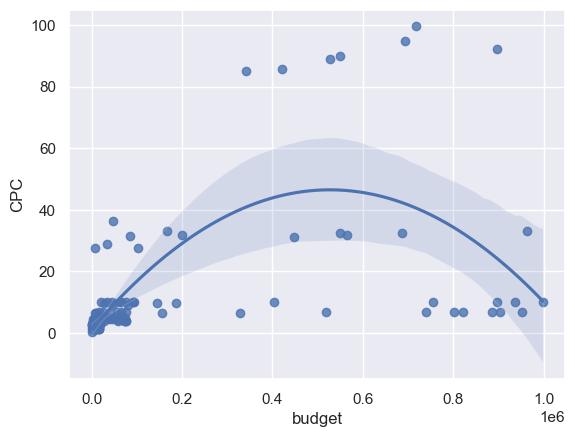

In [142]:
# Insert your code here:
sns.set()
ax = sns.regplot(x="budget", y="CPC", data=df,order = 2)

# Q2. Build a linear regression model to predict CPC (10 pt)

As you know from Q1, the relationship between "clicks" and "budget spent" is not exactly linear. However, a linear model provides a good first-order approximation. You will begin by constructing a simple linear regression model to predict the relationship between clicks and cost *for each keyword*. To this end, you will fit a simple linear regression to predict the number of clicks (Y target variable) as a function of the budget spent (X dependent variable): 

$$ {\rm numberOfClicks}  = \alpha \cdot {\rm budgetSpent} $$

*Notes:* 
- Here, we assume that there is an intercept of zero; to obtain 0 click, you spend £0!
- Ultimately, we aim to construct a dictionary that maps each keyword to the corresponding CPC value.

### Q2.1. Provide detailed comments to explain each line of code below. What is the secret metric?

*Insert answer here: The first 2 lines import the necessary packages for conducting linear regression. The thrid line creates a list of all the keywords in the dataset. The fourth line defines an empty dictionary which will be populated with the CPC for each keyword. The for loop then iterates through every keyword in the list of keywords. The loop selects only those observations in the dataset that match the keyword currently being interated. The values for budget and clicks are then extracted for the current keyword, and a linear regression model without an intercept is fit to the extracted values for budget and clicks (numberOfClicks = 𝛼 ⋅ budgetSpent). The keyword's CPC is then calculated as 1/𝛼, which makes sense because if we rearrange the aforementioned equation we get budgetSpent/numberOfClicks=1/𝛼. The for loop then prints the CPC for the keyword and the in-sample R-squared for the linear regression model fit to the data for that keyword.


In [143]:
import numpy as np
from sklearn.linear_model import LinearRegression

keywords = df.keyword.drop_duplicates().tolist()
CPC = {}

for k in keywords:
    df_k = df[df["keyword"]==k]
    X = df_k.budget.values.reshape((df_k.shape[0],1))
    y = df_k.clicks.values
    reg = LinearRegression(fit_intercept = False)
    reg.fit(X, y)
    CPC[k] = 1.0/reg.coef_[0]
    print("\n SecretMetric of keyword '"+k+"' is: £",1/reg.coef_[0]," per click")
    print("The in-sample R2 for the linear regression is:",reg.score(X,y))


 SecretMetric of keyword 'retail UK' is: £ 3.9310780928924873  per click
The in-sample R2 for the linear regression is: 0.8437186291680528

 SecretMetric of keyword 'free shipping UK' is: £ 6.602238097902133  per click
The in-sample R2 for the linear regression is: 0.9942768652156107

 SecretMetric of keyword 'cardigan' is: £ 31.123341466626297  per click
The in-sample R2 for the linear regression is: 0.21794901967810065

 SecretMetric of keyword 'dua lipa gloves' is: £ 82.3019858622777  per click
The in-sample R2 for the linear regression is: -1.183433985106006

 SecretMetric of keyword 'spotted dress' is: £ 9.869000691497781  per click
The in-sample R2 for the linear regression is: 0.9912605411318857


### Q2.2. Does the predictive model agree with the observations made in Q1.3?

*Insert answer here: Yes. The keyword with the highest CPC is "dua lipa gloves" and the keyword with the lowest CPC is "retail UK".*

# Q3. Find an optimal allocation strategy (15 pt)

Having computed the CPC associated with each keyword, you will now devise how the budget should be allocated across  keywords to maximize the number of clicks. The total budget available is of £1M. 

## Formulating a linear program 

### Q3.0. Formulate the optimal allocation strategy as a linear program

Formulas can be written manually and uploaded into a separate .doc file. Recall that the linear program is determined via three components:
- Decision variables
- Constraints
- Objective function

*Hint:* The goal is to inform how much to spend on each keyword.

*Insert your answer here:* 

Decision variables: The DSP needs to decide how much money to allocate to each keyword.\
Constraints: There is a limited budget that can be allocated among keywords.\
Objective function: The goal for the company is to maximize the reach of the advertising campaign, which is given by the number of clicks for the adverts.

We thus obtain the following linear program:

max numberOfClicks\
subject to budgetSpent<=£1M

which is equivalent to:

max quicksum(budgetSpent[k]/CPC[k] for k in keywords)\
subject to quicksum(budgetSpent[k] for k in keywords)<=£1M

## Model creation

In [144]:
# The following lines of code import the gurobi package and related functions and constants
import gurobipy as gp
from gurobipy import GRB,quicksum

### Q3.1. Create a GUROBI new model `m`, named `allocation`

In [145]:
#Insert your code here:
m = gp.Model("allocation")

## Decision variables

In [146]:
allocation = m.addVars(keywords, lb = 0, name="allocation")
# Note: Each decision variable is in £ unit

### Q3.2. Explain in detail what the code in the above cell is doing.

*Insert your answer here: The code in the cell defines above the decision varaibles as the budget allocated to each keyword.*

## Constraint

### Q3.3. Is there a restriction on the `allocation` variables? Use the construct `m.addConstr()` to add this constraint to the model. 

*Insert your answer here:*


In [147]:
# Uncomment and fill the code below (keep the same structure):

budget_constraint = m.addConstr(quicksum(allocation[k] for k in keywords)<=1000000 ,"budget_constraint")

## Objective

### Q3.4. What is your objective? Which of the following options is correct?

*Insert your answer here: Option 3 is correct because we want to maximize the number of clicks our ads get. The only piece of code which gives you the number of clicks is quicksum(allocation[k] / CPC[k] for k in keywords).


In [148]:
# Option 1
#m.setObjective(allocation.sum(), GRB.MAXIMIZE)

# Option 2
#m.setObjective(quicksum(CPC[k]*allocation[k] for k in keywords), GRB.MAXIMIZE)

# Option 3
m.setObjective(quicksum(1.0/CPC[k]*allocation[k] for k in keywords), GRB.MAXIMIZE)

## Solve

Congratulations! You have formulated and implemented the linear program. You can now optimize the allocation!

In [149]:
# Run the optimization and print the solution vector
def printSolution():
    if m.status == GRB.OPTIMAL:
        print('\nClicks: %g' % m.objVal)
        print('\nAllocation:')
        allocationx = m.getAttr('x', allocation) 
        for k in keywords:            
                print('%s %g' % (k, allocationx[k]))
    else:
        print('No solution:', m.status)
        
m.optimize()
printSolution()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 5 columns and 5 nonzeros
Model fingerprint: 0x0581944e
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 3e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+06, 1e+06]
Presolve removed 1 rows and 5 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5438314e+05   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  2.543831428e+05

Clicks: 254383

Allocation:
retail UK 1e+06
free shipping UK 0
cardigan 0
dua lipa gloves 0
spotted dress 0


### Q3.5. How many keywords are selected in the bidding strategy? Why? Under which conditions is this strategy realistic?

*Hint: To explain the number of selected keywords, you can turn to a geometric intrepretation of the problem.*

*Insert your answer here: Only the "retail UK" keyword is selected in the bidding strategy. This is because "retail UK" is the keyword with the lowest CPC, and since there is no constraint on the way in which the £1M budget is allocated, all of the budget is directed towards this keyword as it would generate the highest amount per clicks. This strategy is realistic only under the condition that the CPC is constant for all keywords, and that "retail UK" is indeed the keyword with the lowest CPC.*



### Q3.6. Based on Q1.4, what aspect is not well-captured by the current CPC model?

*Insert your answer here: The graphs from Q1.4 strongly suggest that the relationship between budget and number of clicks is non-linear, which completely contradicts the current CPC model that our optimization strategy is based on.*



# Q4. Diversification (10 pt)

Ben (who is not well-versed in optimization) is puzzled by the output of the model. 

*Should we put all our eggs in one basket? I suggest to impose a constraint that at most £300,000 are invested on each single keyword. Hopefully, this will diversify our allocation strategy.*

### Q4.1 Add these constraints to the current model `m`. Store them a new dictionary `diversification_constrs`.

*Hint: Use the `m.addConstr()` or `m.addConstrs()` construct, and have a loop over the keywords.*

In [150]:
# Uncomment and fill the code below

diversification_constrs={}
for k in keywords:
    diversification_constrs[k] = m.addConstr(allocation[k]<=300000 ,"diversification_constraint_"+k)

*Execute the next cell to re-run the model and print the optimal allocation of budget.*

In [151]:
m.optimize()
printSolution()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6 rows, 5 columns and 10 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-02, 3e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+05, 1e+06]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5438314e+05   7.000000e+05   0.000000e+00      0s
       3    1.5536532e+05   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.553653168e+05

Clicks: 155365

Allocation:
retail UK 300000
free shipping UK 300000
cardigan 100000
dua lipa gloves 0
spotted dress 300000


### Q4.2. How do you explain the optimal amount spent on each keyword? Why is the keyword "dua lipa gloves"  left out?

*Insert your answer here: Similar to the previous model, this one also allocates the funds to the keyword with the lowest CPC, but the model is now constrained in terms of how much modeny it can allocate to a single keyword (<= £300K). The model therefore chooses to allocate the maximum amount to the 3 keywords with the lowest CPC, and the remaining £100K to the keyword with the 4th lowest CPC. The keyword that has the highest CPC, "dua lipa gloves", is left out because of this.*



### Q4.3. How many more clicks can be generated by slightly increasing the 300K diversification goal in the new constraints?
*Hint:* What notion allows you to conduct a sensitivity analysis? Use the dictionary `diversification_constrs` declared in Q4.1.

Insert your answer here: Increasing the 300K diversification goal in the new constraints by £1 will generate an additional number of clicks equal to: 

ShadowPrice(diversification_constraint_retail_UK) + ShadowPrice(diversification_constraint_free_shipping_UK) + ShadowPrice(diversification_constraint_spotted_dress) = 0.222+0.119+0.069=0.41

This is because ShadowPrice(C)=delta(optimal value of the LP)/delta(RHS of the constraint C)

In [152]:
# Insert your code below
for k in keywords:
    print(str(k)+": "+ str(diversification_constrs[k].Pi))  

retail UK: 0.2222529166807552
free shipping UK: 0.1193335631200969
cardigan: 0.0
dua lipa gloves: 0.0
spotted dress: 0.06919715553912442


# Q5. The economics of advertising (10 pt)

Ben would like to get further insights about the financial outcomes of this marketing campaign. Specifically, he seeks to understand how the campaign budget might affect the revenue generated by the online website. He expects that each click is monetized at £4 on average (£4 per click), in view of the subsequent purchases made by the new visitors. 

*With more traffic, we can achieve more revenue and cover our advertising investments. It would be ideal if this marketing campaign breaks even!*

The key financial metric the net revenue from this marketing campaign:

$$ {\rm netRevenue} = {\rm totalRevenue} - {\rm totalBudget}$$


### Q5.1 Plot the optimal net revenue as a function of the total budget. Fill the code below.

*Hint:* Re-use model `m` constructed in questions Q3 and Q4 to achieve the following:
1. To modify the budget constraint, you can use the construct `budget_constraint.setAttr("rhs",NEWBUDGET)` for each modified budget value `NEWBUDGET`.
- Vary the budget constraint from 0 to £1M with increments of £100K, and compute the corresponding net revenue based on the above formula.
- Construct a scatter plot of "net revenue" as a function of "budget". 

In [153]:
# We declare an array that contains the budgets from 0 to £1M by increments of £100K
budgets = np.arange(0,1100000,100000)

# We declare an array that contains the corresponding optimal net revenue
net_revenue = np.zeros(11)

# We run the optimization for each budget value using a "for" loop
for i in range(11):
    # Since we will run the optimization for multiple budget value, we deactivate the logs of the solver
    m.setParam('OutputFlag', 0)

    # Step 1: Write code here to modify the budget (see item 1 in the above "hint")
    budget_constraint.setAttr("rhs",budgets[i])
    
    # Step 2: After that, you re-optimize the model
    m.optimize()
    
    # Step 3: Finally, you compute the optimal net revenue and store it in the array `net_revenue`
    net_revenue[i]=4*m.objVal-budgets[i]


Text(0, 0.5, 'Net revenue')

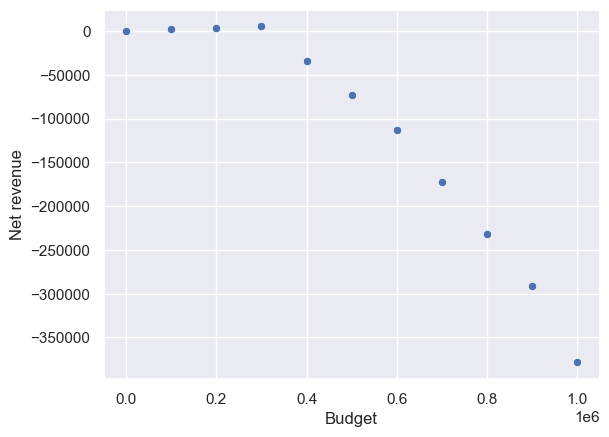

In [154]:
# Run this cell to plot the net revenue as a function of the budget 
ax = sns.scatterplot(x=budgets,y=net_revenue)
ax.set_xlabel("Budget")
ax.set_ylabel("Net revenue")

### Q5.2 Is there any concern you would like to share with Ben?

*Insert your answer here: Under the current diversification constraints where every keyword needs to have a budget lower or equal to £300K, the net revenue generated by the advertising campaign will be negative for any budget that is significantly greater than £300K. This is because the keyword "retail UK" is the only keyword for which the revenue per click is greater than the cost per click. For all other keywords, the CPC is much greater than the £4 revenue per click. Thus, the campaign will only result in a positive net revenue when the budget constraint is below or close to £300K, and nearly all the budget is allocated to the "retail UK" keyword. Net revenue becomes negative as we increase the budget because in our current optimization algorithm we are maximizing the number of clicks, and therefore total revenue, instead of net revenue. Maximizing number of clicks for large budgets leads us to allocate money towards unprofitable keywords (the ones other than "retail UK"). To conclude, under the current constraints the optimal strategy is to have a budget of £300K, when all money is allocated to "retail UK". To increase net revenue further we might want to ditch the diversification constraint. We might also want to replace our current objective function with one that represents net revenue instead of number of clicks.*



# Q6. The Optimal Budget (15 pt)

Ben has an idea: *May be we can use linear programming to find the optimal budget to maximize our net revenue!* Concretely, Ben's suggestion is write down an alternative linear programming model, where "budget" is an additional decision variable and the objective is to maximize the total net revenue.

### Q6.1. Formulate the optimal allocation strategy as a linear program

*Hints:* Formulas can be written manually and uploaded into a separate .doc file. The model is nearly identical to Q3 except that we have one more variable and a different objective.

The optimization problem now becomes:

max 4*numberOfClicks-budgetSpent\
subject to quicksum(allocation[k] for k in keywords)<=budgetSpent\
and allocation[k]<=300000, for all k

This is equivalent to:\
Max 4*quicksum(allocation[k]/CPC[k] for k in keywords)-budgetSpent\
subject to quicksum(allocation[k] for k in keywords)<=budgetSpent\
and allocation[k]<=300000, for all k

## Model creation

### Q6.2. Create a GUROBI new model `m`, named `"allocation-budget"`

*Hint: Reuse the code of question Q3.1! Reference the model as `m` (overload of the earlier reference)*

In [155]:
#Insert your code here:
m = gp.Model("allocation")

## Decision variables

### Q6.3. Add decision variables to the model

*Hint: You may reuse the code of question Q3.2, but you also need to declare a new variable "budget"*

In [156]:
#Insert your code here:
allocation = m.addVars(keywords, lb = 0, name="allocation")
budget = m.addVar(name="budget", lb = 0)

## Constraints

### Q6.4. Add a constraint on the total budget that can be spent

*Hint: The code is very similar to question Q3.3, but you need to account for the variable "budget"*

In [157]:
#Insert your code here:
budget_constraint = m.addConstr(quicksum(allocation[k] for k in keywords)<=budget ,"budget_constraint")

### Q6.5. Add a constraint for diversification

*Hint: Reuse the same code as Q4.1!*

In [158]:
#Insert your code here:
diversification_constrs={}
for k in keywords:
    diversification_constrs[k] = m.addConstr(allocation[k]<=300000 ,"diversification_constraint_"+k)

## Objective

### Q6.6 Specify the linear objective 

*Hint: Look-up the code of question Q3.4. However, the objective is different: now, we want to maximize the net revenue:*
$$\sum_{k} \frac{4}{CPC_k}\cdot {\rm allocation}_k - budget $$

In [159]:
#Insert your code here:
m.setObjective(quicksum(4/CPC[k]*allocation[k] for k in keywords)-budget, GRB.MAXIMIZE)

## Solve

Congratulations! You have formulated and implemented the linear program. You can now optimize the net revenue and printout the solution.

In [160]:
# Run the optimization and print the solution vector
def printSolution():
    if m.status == GRB.OPTIMAL:
        print('\nNet Revenue: %g' % m.objVal)
        print('\nAllocation:')
        allocationx = m.getAttr('x', allocation)
        for k in keywords:            
                print('%s %g' % (k, allocationx[k]))
        print("\nBudget: ",budget.x)
    else:
        print('No solution:', m.status)
m.optimize()
printSolution()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6 rows, 6 columns and 11 nonzeros
Model fingerprint: 0x07ef97b7
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+05, 3e+05]
Presolve removed 6 rows and 6 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.2597714e+03   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  5.259771402e+03

Net Revenue: 5259.77

Allocation:
retail UK 300000
free shipping UK 0
cardigan 0
dua lipa gloves 0
spotted dress 0

Budget:  300000.0


### Q6.7. What is the optimal budget level? Which keyword(s) are then selected? How do you interpret this result?

*Insert your answer here: As expected, the optimal budget is £300K, with the entire budget being allocated to the "retail UK" keyword. Again, this is because "retail UK" is the only profitable keyword, meaning that the revenue generated per click is higher than the cost per click (CPC). All other keywords are unprofitable, which is why no money is allocated to them even though the budget can be increased beyond £300K.*

### Q6.8. In fact, Ben wants to spend the largest possible budget for which the firm breaks even. Modify the LP accordingly. Is the optimal budget larger or smaller than in Q6.7?

*Insert your answer here: According to the optimization algorithm below, the optpimal budget is now £313344.77. This is larger than the budget in Q6.7, which is expected because we are now maximing the budget instead of the net revenue, which is here constrained to be 0. The algorithm increases the budget from £300K to ~£313K by also allocating money to the keyword with the second lowest CPC, "free shipping UK". This keyword is still losing money because its CPC is higher than £4). Thus, money keeps being allocated to the keyword with the second lowest CPC and negative profitability until the net revenue reaches 0. This strategy maximizes the break-even budget.*


In [161]:
# Insert your code here:
m = gp.Model("allocation")

allocation = m.addVars(keywords, lb = 0, name="allocation")
budget = m.addVar(name="budget", lb = 0)

break_even_constraint = m.addConstr(quicksum(4/CPC[k]*allocation[k] for k in keywords)-budget==0, "break_even_constraint")
budget_constraint = m.addConstr(quicksum(allocation[k] for k in keywords)<=budget ,"budget_constraint")
diversification_constrs={}
for k in keywords:
    diversification_constrs[k] = m.addConstr(allocation[k]<=300000 ,"diversification_constraint_"+k)
    
m.setObjective(budget, GRB.MAXIMIZE)


def printSolution():
    if m.status == GRB.OPTIMAL:     
        print('\nAllocation:')
        allocationx = m.getAttr('x', allocation)
        sums=0
        for k in keywords:            
                print('%s %g' % (k, allocationx[k]))
                sums+=4*allocationx[k]/CPC[k]
        print("\nBudget: ",budget.x)
        print('\nNet Revenue: %g' %(sums-budget.x))
    else:
        print('No solution:', m.status)
m.optimize()
printSolution()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 6 columns and 17 nonzeros
Model fingerprint: 0xf9025848
Coefficient statistics:
  Matrix range     [5e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+05, 3e+05]
Presolve removed 7 rows and 6 columns
Presolve time: 0.02s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.1334477e+05   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.04 seconds (0.00 work units)
Optimal objective  3.133447678e+05

Allocation:
retail UK 300000
free shipping UK 13344.8
cardigan 0
dua lipa gloves 0
spotted dress 0

Budget:  313344.76778467005

Net Revenue: 0


# Q7. Practical considerations (15 pt)

We now adopt a critical view on our linear programming model, and discuss approaches to make it more realistic. 

Please provide qualitative answers to the following questions. There is not a single correct answer, so be creative and detailed!

### Q7.1. What other aspects of the marketing campaign it would be useful to predict? Why? 

*Insert your answer here: To have a more complete understanding of the potential success of the marketing campaign, it would be useful if we could predict the number of new customers acquired through the campaign and these new customers' lifetime value to our company. Moreover, it's also important to understand the effect our marketing campaign has on current customers, who might decide to switch from physical store purchases to online purchases (cannibalization). Therefore, rather than only trying to predict the online revenue generated by the marketing campaign, we should also look at the campaign's effects on physical store sales in order to gouge the full success or failure of the marketing campaign. As a first step, I believe that we should try to better predict the revenue per click for each keyword, which we have assumed to be £4 in accordance with Ben's claims. I believe this assumption is highly unlikely as intuitively different keywords should have different revenues per click.*

### Q7.2. In the first part of the workshop, the goal was to maximize the number of clicks. In practice, what objective retailers care about  when acquiring new users? 

*Insert your answer here: In practice, when acquiring new users retailers care the most about the users' lifetime value to the firm, and how that value compares to the cost of acquiring the users (the cost of the marketing campaign). Number of clicks is a rather bad proxy for both the number of new customers and for the revenue potentailly generated by the marketing campaign.*


### Q7.3.  In practice, you might have very limited data on each keyword, and the popular keywords are constantly changing due to various trends (e.g., new Dua Lipa gloves). Why is this an issue? How would you modify your strategy to cope with this issue?

*Insert your answer here: Popular keywords changing due to various trends is an issue because this means that the cost per click for each keyword is likely changing over time, which might make that keyword change from being profitable to unprofitable or vice versa. To cope with this issue, the marketing department should constantly track such trends and identify any significant changes that might occur to key metrics such as cost per click, and then update the strategy accordingly. However, having sparse data on keywords that isn't periodically updated might make the this hard to do. One way we might try to tackle this issue is by using other predictors in our analsysis. For example, we could extract data from Google on the current popularity of each keyword, and then incorporate this somehow into our CPC prediction, even though there is no new marketing campaign in the DSP's records that can inform us about the change in CPC to that keyword.*


### Q7.4. Retailers often post ads on several online exchanges, simultaneously. The same user might see your ad several times (across platforms and keywords) before s/he decides to click. Is this an issue? Why?

*Insert your answer here: The fact that users might see an ad several times before s/he decides to click on it is an issue for our anaylsis because this makes it difficult to attribute the click to a specific keyword or advertising platform. This might imply that metrics such as cost per click are innacurate, and therefore our budget allocation amongst keywords or platforms might not be optimal. Partaining to our example, the keyword "retail UK" migth be the last keyword seached by someone before clicking on the ad and buying the product, which would give it the lowest cost per click. However, that customer might have previously encountered the ad when searching another keyword, which is what really made the customer interested in the product.*



# Q8. Piecewise Linear CPC Models (Difficult, Optional, 5pt Bonus)

You find the current linear CPC model quite unrealistic. According to this model, the cost grows linearly in the desired number of clicks. Your intuition is that the CPC cost is a non-linear function of the budget. *Getting 1M clicks is relatively more expensive than getting a thousand clicks!*

The following heatmap plots the CPC per keyword and per budget level:

<img src="CPC.png" width="800">

### Q8.1. Does the heatmap support your intuition? What phenomenon explains the variation of the CPC?

*Insert your answer here: The heatmap above supports the intuition that CPC should increase as the budget increases, which is what Q1.3 also suggests. The variation of the CPC is essentially explained by the phenomenon that the number of clicks doesn't grow linearly with the number of impressions (which is likely proportional to cost). In reality, as you increase the number of impressions, it is more difficult generate additional clicks due to marketing fatigue or saturation of the market. For instance, if a user sees the same advertisement repeatedly, that user will be less inclined to click. This means that the function that maps clicks to impressions is concave. Assuming a linear relationship between impressions and budget, this means that the function mapping clicks to budget is also concave. The inverse of this function, which is what maps budget to clicks, is therefore convex. The fact that this function is convex tells us that CPC increases as cost increases.*


Consequently, we will approximate the CPC model using a **piecewise linear function** instead of a **linear model**. The parameters of the piecewise model were estimated on data and described below. 

In [162]:
# The following dictionary contains the linear slopes in each budget segment, for each keyword

pieces_list = ['piece A','piece B']
PiecewiseCPC = {('retail UK', 'piece A'): [4.1, 0, 20000],
                 ('retail UK', 'piece B'): [1e+100, 20000, 1000000],
                 ('free shipping UK', 'piece A'): [3.0, 0, 20000],
                 ('free shipping UK', 'piece B'): [6.9, 20000, 1000000],
                 ('cardigan', 'piece A'): [1.5, 0, 20000],
                 ('cardigan', 'piece B'): [41.1, 20000, 1000000],
                 ('dua lipa gloves', 'piece A'): [2.5, 0, 20000],
                 ('dua lipa gloves', 'piece B'): [233.6, 20000, 1000000],
                 ('spotted dress', 'piece A'): [4.7, 0, 20000],
                 ('spotted dress', 'piece B'): [10.4, 20000, 1000000]}

In [163]:
keywords

['retail UK',
 'free shipping UK',
 'cardigan',
 'dua lipa gloves',
 'spotted dress']

*How do you interpret the PiecewiseCPC dictionary?*
- The CPC model has two linear pieces.
- For example for "cardigan", the cost increases initially by £1.5 per click, between 0 and 20,000 clicks. Next, the cost increases by £41.1 per click, between 20,000 and 1,000,000 clicks. 

*Why is the slope very large for the keyword "retail UK" on piece B*?
- There is no historical data point to inform the slope above 20,000 clicks for the keyword "retail UK"
- Instead of extrapolating what the slope would be, we put a large conservative value, so that our model won't pick a budget larger than that corresponding to 20,000 clicks.
- *When you don't know, you should not guess!*

### Q8.2. Develop a linear program that optimizes the allocation of £1M under piecewise linear CPC models. 

*Hint: Create one extra decision variable for each keyword and piece of the CPC function. For example, the "retail UK" allocation variable can be decomposed as  $x_{retailUK}  = y_{retailUK,A} + y_{retailUK,B} $ with two new decision variables $y_{retailUK,A},y_{retailUK,B}$, where $y_{retailUK,A}$ is upper bounded by 20,000.*

*In the next cells, create the model.*

In [164]:
#Insert your code below:
m = gp.Model("allocation_piecewise")

allocation = m.addVars(keywords, lb = 0, name="allocation")
ub_auxiliary = {(k,s): (PiecewiseCPC[k,s][2] - PiecewiseCPC[k,s][1]) for k in keywords for s in pieces_list}
auxiliary = m.addVars(keywords,pieces_list, lb = 0, ub = ub_auxiliary, name="auxiliary")

budget_constraint = m.addConstr(quicksum(allocation[k] for k in keywords)<=1000000 ,"budget_constraint")
coupling_constraints = m.addConstrs((quicksum(auxiliary[k,s] for s in pieces_list) == allocation[k] 
                                     for k in keywords), "coupling constraint")

#I assume that the objective function is given by the number of clicks, as in Q3, since the following question asks to compare
#the piecewise model with the one in Q3.
m.setObjective(quicksum(1.0/PiecewiseCPC[k,s][0]*auxiliary[k,s] for k in keywords for s in pieces_list), GRB.MAXIMIZE)


def printSolution():
    if m.status == GRB.OPTIMAL:
        print('\nClicks: %g' % m.objVal)
        print('\nAllocation:')
        allocationx = m.getAttr('x', allocation) 
        for k in keywords:            
                print('%s %g' % (k, allocationx[k]))
    else:
        print('No solution:', m.status)
m.optimize()
printSolution()

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: Intel(R) Core(TM) i5-8265U CPU @ 1.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6 rows, 15 columns and 20 nonzeros
Model fingerprint: 0x989488c9
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-100, 7e-01]
  Bounds range     [2e+04, 1e+06]
  RHS range        [1e+06, 1e+06]
Presolve removed 5 rows and 6 columns
Presolve time: 0.01s
Presolved: 1 rows, 9 columns, 9 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6666667e+05   1.225000e+05   0.000000e+00      0s
       1    1.6756815e+05   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.675681505e+05

Clicks: 167568

Allocation:
retail UK 20000
free shipping UK 920000
cardigan 20000
dua lipa gloves 20000
spotted dress 20000


### Q8.3. Which keywords are selected in the optimal allocation strategy? Compare to Q3.

Insert your answer here: In the piecewise model, all keywords are selected in the optimal strategy. In Q3, only the "retail UK" was selected for budget allocation, receiving all the budget of £1M. However, the method through which the budget is allocated is pretty much the same for both models: the budget simply gets allocated to the keywords with the lowest CPC, as this generates the highest number of clicks. Because CPCs remain constant in Q3 irrespective of budget allocation, the entire budget is simply allocated to the keyword with the lowest CPC. Meanwhile, in the piecewise model the CPC of a keyword increases once the budget allocated to that keyword exceeds £20000. Then, because the lowest CPC of a keyword in the (£20000, £1000000) segment, which is 6.9 ("free shipping UK"), is higher than the highest CPC of a keyword in the (£0, £20000) segment, which is 4.7 (spotted dress), the piecewise model will first allocate £20000 to all keywords. The model will then allocate the whole remaining budget, £900000, to the keyword with the lowest CPC in the (£20000, £1000000) segment, "free shipping UK". Thus, the final allocatin for "free shipping UK" is £920K, and £20K for all other keywords. Nevertheless, the allocation method is the same as in Q3 because the priority of keywords is determined solely by how low their current/**marginal** CPC is. We can simply think of these models as allocating money to the keyword that has the lowest marginal CPC. When a keyword reaches the £20000 threshold, its marginal CPC changes and the model might start allocating money to another keyword that has a lower marginal CPC.



### About the piecewise linear model...

How would you estimate the piecewise linear CPC model from historical data? The code is provided below. 
1. Slice the data set into three budget segments: [0,20000],  [20000,1000000], 
- Within each budget segment, fit a linear regression model to obtain the "slope" of the CPC function
- In this case, you need to use an intercept in the model.



In [165]:
keywords = df.keyword.drop_duplicates().tolist()
pCPC = {}
pieces = {'piece A': [0,20000], 'piece B': [20000,1000000]}

for k in keywords:
    for p in pieces.keys():
        df_k = df[(df["keyword"]==k) &(pieces[p][0]<=df['budget'])&(pieces[p][1]>=df['budget'])]
        if df_k.shape[0]> 0:
            X = df_k.budget.values.reshape((df_k.shape[0],1))
            y = df_k.clicks.values 
            reg = LinearRegression(fit_intercept = True).fit(X, y)
            pCPC[k,p] = [1.0/reg.coef_[0]] + pieces[p]
            print("\n CPC of keyword "+k+ " and "+p+" is: £",1/reg.coef_[0]," per click")
            print("The R2 for the linear regression is:",reg.score(X,y))            
        else:
            pCPC[k,p] = [GRB.INFINITY] + pieces[p]            


 CPC of keyword retail UK and piece A is: £ 4.108797336465324  per click
The R2 for the linear regression is: 0.8459055955015281

 CPC of keyword free shipping UK and piece A is: £ 3.040688826141064  per click
The R2 for the linear regression is: 0.8084685625178041

 CPC of keyword free shipping UK and piece B is: £ 6.943809878345913  per click
The R2 for the linear regression is: 0.9985379109774118

 CPC of keyword cardigan and piece A is: £ 1.5581151104525688  per click
The R2 for the linear regression is: 0.4575230748616187

 CPC of keyword cardigan and piece B is: £ 41.15743647805941  per click
The R2 for the linear regression is: 0.8732355509244926

 CPC of keyword dua lipa gloves and piece A is: £ 2.495861169515519  per click
The R2 for the linear regression is: 0.9998388558619081

 CPC of keyword dua lipa gloves and piece B is: £ 233.57280649945102  per click
The R2 for the linear regression is: 0.21762698141762626

 CPC of keyword spotted dress and piece A is: £ 4.668905691297